### Exploring the Sequences of Technical Difficulties
The aim here is to discover identifiers of technical difficulties. Are there sequences of behaviour that lead to the outcome have having technical difficulties?

*Why do this?*
This would provide an insight into the types of sequence patterns that users of interactive-media experiences exhibit when they experience some form of technical difficulty with the experience itself. Obviously, in this case, the focus is on video bufferring issues at this is the main reported technical problem with CAKE.

*What do we currently know about the technical difficulties?*
That the technical difficulties (apart from two users) are video-related issues. Each of the participants report that once they began to experience issues with the videos, they all switch to the written/cardview (where the cooking instructions are in a written format).

*Points to consider*
While each of the users in this example persevered through the video issues (they switched views), it's resonable to presume that this is due to the nature of where the data was collected from (the user experience study) whereas in a real setting most users probably wouldn't do this -- if they had issues, then it's unlikely that they would persevered (maybe a small percentage would). But conversationally, this highlights the need to detect and provide some form of fix for these issues -- to increase the retention rate of the experience(s). 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

As we know, due to the participants reporting, each participant that had video-related issues switched to the card view to solve this problem and complete the user experience study. So the first thing to establish is for each of these users, when is the first occurrence of this switching of views.

As a note: It's worth noting that the switching to the card view, in this case, is seen as a solution to the problem as the participants report a positive experience (overall) with CAKE while using the card view.

In [3]:
# First read in the two datasets; statistical and raw.
td_raw = pd.read_csv('./data/cake_td_raw_data.csv')
td_stats = pd.read_csv('./data/cake_td_stats_data.csv')
td_raw.head()

,id,participant_id,timestamp,pagetime,item,action,message,combined,combined_num
0,2251,109,2017-08-20 19:21:27,0,play_pause_button,play,NaN,play_pause_button play,9
1,2258,109,2017-08-20 19:26:34,0,full_screen_button,fullscreen,NaN,full_screen_button fullscreen,27
2,3218,407,2017-08-22 22:00:41,0,play_pause_button,play,NaN,play_pause_button play,9
3,3219,407,2017-08-22 22:01:46,0,play_pause_button,play,NaN,play_pause_button play,9
4,3220,407,2017-08-23 08:06:17,0,play_pause_button,play,NaN,play_pause_button play,9


Let's firstly drop the participant 407, they only have three events logged and their issue was with the login form not working.

In [4]:
td_raw.drop(td_raw[td_raw['participant_id'] == 407].index, inplace=True)
td_stats.drop(td_stats[td_stats['userid'] == 407].index, inplace=True)

The participant with the ID 109 has some interesting behaviour, as you can see below they've recorded two interactions and then (it seems) left. 

In [5]:
td_raw[td_raw['participant_id'] == 109].head()

,id,participant_id,timestamp,pagetime,item,action,message,combined,combined_num
0,2251,109,2017-08-20 19:21:27,0,play_pause_button,play,NaN,play_pause_button play,9
1,2258,109,2017-08-20 19:26:34,0,full_screen_button,fullscreen,NaN,full_screen_button fullscreen,27
5,3290,109,2017-08-23 17:52:23,0,play_pause_button,play,NaN,play_pause_button play,9
6,3292,109,2017-08-23 17:56:00,0,play_pause_button,play,NaN,play_pause_button play,9
7,3305,109,2017-08-23 18:00:09,0,play_pause_button,pause,NaN,play_pause_button pause,16


So, as you can see - the first two events (while valuable bits of information) - could cause some problems when looking into their interaction pattern. Furthermore, just looking at the timings of the events (the time between the play button being clicked and the full screen button) to me, at least, seems to indicate that they were happily watching the video. I believe it's worth removing these first two events from the data so we can focus on the full interaction.

In [6]:
td_raw.drop(td_raw.index[[0,1]], inplace=True)
td_raw.head()

,id,participant_id,timestamp,pagetime,item,action,message,combined,combined_num
5,3290,109,2017-08-23 17:52:23,0,play_pause_button,play,NaN,play_pause_button play,9
6,3292,109,2017-08-23 17:56:00,0,play_pause_button,play,NaN,play_pause_button play,9
7,3305,109,2017-08-23 18:00:09,0,play_pause_button,pause,NaN,play_pause_button pause,16
8,3306,109,2017-08-23 18:00:36,0,full_screen_button,fullscreen,NaN,full_screen_button fullscreen,27
9,3307,109,2017-08-23 18:00:38,0,full_screen_button,collapsed,NaN,full_screen_button collapsed,19


In [7]:
# Now, let's look at when the first occurrence of when the card view toggle is.
td_pids = td_raw['participant_id'].unique()
first_occurrence = {}
for pid in td_pids:
    temp_df = td_raw[td_raw['participant_id'] == pid]
    loc_index = temp_df['item'].eq('cardView').idxmax()
    first_occurrence[pid] = loc_index

first_occurrence

{109: 29, 112: 234, 113: 553, 121: 165, 205: 68, 217: 489, 220: 309}

In [8]:
# So first off, let's look at the number of events before the first card view toggle.
number_of_events = {}
for key, value in first_occurrence.items():
    temp_df = td_raw[td_raw['participant_id'] == key]
    number_of_events[key] = len(temp_df.loc[:value])

number_of_events

{109: 25, 112: 25, 113: 11, 121: 20, 205: 13, 217: 21, 220: 17}

Now that we have some basic data, let's just turn the two dictionaries into dataframes.

In [9]:
td_event_df = pd.DataFrame.from_dict(first_occurrence, orient='index')
td_event_df.columns = ['first_occ']
td_event_df['num_events_up_to'] = pd.Series(number_of_events)
td_event_df

,first_occ,num_events_up_to
109,29,25
205,68,13
121,165,20
112,234,25
220,309,17
217,489,21
113,553,11


In [10]:
# Even though these are basic bits of information, let's just print out some descriptive statistics.
td_event_df.describe()

,first_occ,num_events_up_to
count,7.000000,7.000000
mean,263.857143,18.857143
std,200.213576,5.490251
min,29.000000,11.000000
25%,116.500000,15.000000
50%,234.000000,20.000000
75%,399.000000,23.000000
max,553.000000,25.000000


Let's look at some time-based data

In [11]:
# Convert the timestamp column to a datetime object type.
td_raw['timestamp'] = pd.to_datetime(td_raw['timestamp'])

Let's first calculate the total length of the subsequence, i.e. how long it took for each participant to switch to the card view.

In [12]:
# function to calculate the difference between two datetime objects.
def diff_in_mins(t1, t2):
    td = t1 - t2
    m, s = divmod(td.total_seconds(), 60)
    h, m = divmod(m, 60)
    return "%d:%02d:%02d" % (h, m, s)

In [13]:
length_mins_until_cardview = {}
for row in td_event_df.itertuples():
    temp_df = td_raw[td_raw['participant_id'] == row.Index]
    timestamps = temp_df.loc[:row.first_occ, 'timestamp']
    first_ts = timestamps.iloc[0]
    last_ts = timestamps.iloc[-1]
    length_mins_until_cardview[row.Index] = diff_in_mins(last_ts, first_ts)
print(length_mins_until_cardview)

{109: '0:14:55', 205: '0:05:55', 121: '0:09:46', 112: '0:09:57', 220: '0:09:51', 217: '0:07:45', 113: '0:02:43'}


In [14]:
td_event_df['time_until_cardview'] = pd.Series(length_mins_until_cardview)
td_event_df

,first_occ,num_events_up_to,time_until_cardview
109,29,25,0:14:55
205,68,13,0:05:55
121,165,20,0:09:46
112,234,25,0:09:57
220,309,17,0:09:51
217,489,21,0:07:45
113,553,11,0:02:43


In [138]:
# Example of where the lead up to the card view toggle is reasonable (evenly spaced out events) and probably shouldn't be considered.
pd.set_option("display.max_rows",999)
td_raw[td_raw['participant_id'] == 217].head(200)

,id,participant_id,timestamp,pagetime,item,action,message,combined,combined_num
469,4808,217,2017-08-27 18:37:20,0,full_screen_button,fullscreen,NaN,full_screen_button fullscreen,27
470,4809,217,2017-08-27 18:37:22,0,play_pause_button,play,NaN,play_pause_button play,9
471,4810,217,2017-08-27 18:37:55,0,play_pause_button,pause,NaN,play_pause_button pause,16
472,4811,217,2017-08-27 18:37:59,0,full_screen_button,collapsed,NaN,full_screen_button collapsed,19
473,4812,217,2017-08-27 18:38:07,0,play_pause_button,play,NaN,play_pause_button play,9
474,4813,217,2017-08-27 18:38:41,0,full_screen_button,fullscreen,NaN,full_screen_button fullscreen,27
475,4814,217,2017-08-27 18:38:43,0,play_pause_button,play,NaN,play_pause_button play,9
476,4815,217,2017-08-27 18:39:05,0,play_pause_button,pause,NaN,play_pause_button pause,16
477,4816,217,2017-08-27 18:39:08,0,full_screen_button,collapsed,NaN,full_screen_button collapsed,19
478,4817,217,2017-08-27 18:42:39,0,full_screen_button,fullscreen,NaN,full_screen_button fullscreen,27


This is some time series-based analysis of the events themselves.

What we've noticed visually inspecting the technical difficulties data (per user, there isn't much of it) is that the back button which has the functionality of "rewind", i.e. the ability to go back a step, is heavily used. For example, participant 220 has 19 recorded back button clicks in 10 seconds and similarly 217 has 7 clicks in 4 seconds. There is an argument here that this behaviour is indicative of frustration (?) or attempting to solve the issue with the videos by going back to the previous step, almost attempting to reset the experience. 

The key here is to see what the event trend looks like from a time perspective and then dig a little deeper, i.e. does the same trend appear in the typical data set.

The first set of results below is a resampling of the events to see how many events are recorded every minute for the duration of each session.

In [16]:
def get_ts_data(pid):
    td_data = td_raw[td_raw['participant_id'] == pid]['timestamp'].values
    ts_df = pd.DataFrame(td_data, columns=['timestamp'])
    ts_df['timestamp'] = pd.to_datetime(ts_df['timestamp'])
    ts_df['count'] = 1
    ts_df.index = ts_df['timestamp']
    del ts_df['timestamp']
    return ts_df

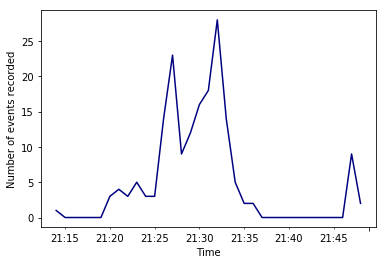

In [126]:
ts_df = get_ts_data(220)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('Number of events recorded')

The above plot is the participant that is the most interesting out of the set, they're the ones that have a recording of the back button being clicked 19 times in 10 seconds -- which I believe is the most prominant spike in the middle. 

Text(0,0.5,'# of events')

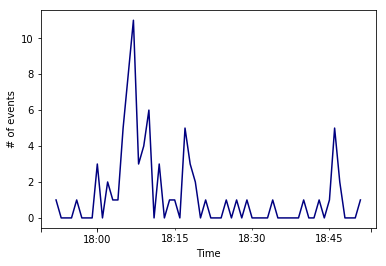

In [18]:
ts_df = get_ts_data(109)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('# of events')

Text(0,0.5,'# of events')

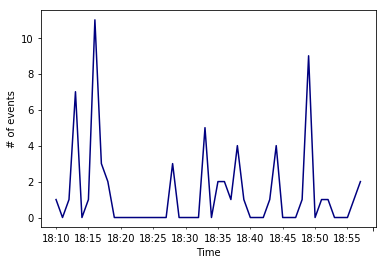

In [19]:
ts_df = get_ts_data(205)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('# of events')

Text(0,0.5,'# of events')

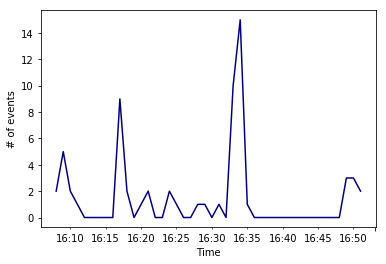

In [20]:
ts_df = get_ts_data(121)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('# of events')

Text(0,0.5,'# of events')

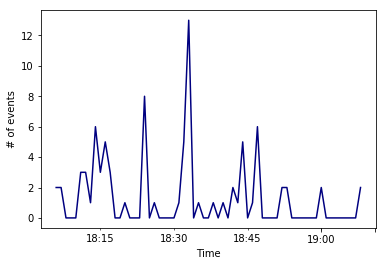

In [21]:
ts_df = get_ts_data(112)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('# of events')

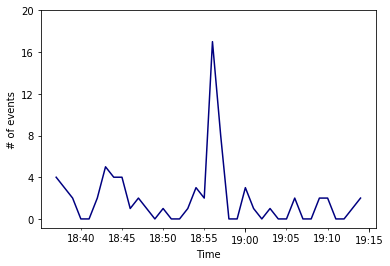

In [133]:
ts_df = get_ts_data(217)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('# of events')
ax.set_yticks([0, 4, 8, 12, 16, 20])

Text(0,0.5,'# of events')

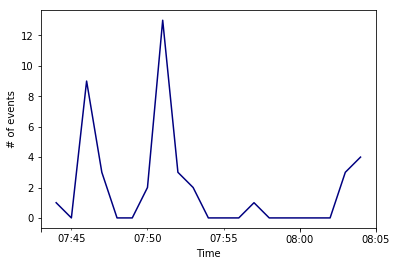

In [23]:
ts_df = get_ts_data(113)
ax = ts_df.resample('T').sum().plot(colormap='jet', legend=False)
ax.set_xlabel('Time')
ax.set_ylabel('# of events')

Let's explore some of the typical participants events and see if there is a similar trend in their events.

In [24]:
# read in the typical events data
typical_df = pd.read_csv('./data/live-interactions.csv')

Let's make sure that we remove the atypical participants and linear.

In [ ]:
atypical_pids = [109, 407, 205, 121, 112, 220, 217, 113]
typical_pids = [206, 223, 106, 213, 225, 211, 221, 209, 124, 212, 102, 204, 210, 201, 214, 208, 114, 101, 202, 105, 127, 117, 222, 203, 104, 122, 126, 414, 123, 115, 110, 103, 215]

# Drop the atypical users
typical_df = typical_df.drop(typical_df[typical_df['participant_id'].isin(atypical_pids)].index)

# Drop the non-CAKE participants
typical_df = typical_df.drop(typical_df[~typical_df['participant_id'].isin(typical_pids)].index)

Now that we've isolated the typical users, let's do a basic value count of the back button appearances and then move on to looking at each of the participants.

In [33]:
typical_item_counts = typical_df['item'].value_counts()
typical_item_counts

next_button           668
video_end             460
back_button           230
play_pause_button     219
experience_level       88
cook_reason            86
cooking_for            85
select_recipe          78
cardView               70
full_screen_button     64
confirm_cook           51
not_quite_button       31
Name: item, dtype: int64

Okay, but what does that look like in comparison to the atypical data set?

In [34]:
atypical_item_counts = td_raw['item'].value_counts()
atypical_item_counts

next_button           231
back_button           172
cardView               41
play_pause_button      39
full_screen_button     27
cook_reason            14
cooking_for            14
experience_level       14
select_recipe          14
confirm_cook            8
not_quite_button        5
Name: item, dtype: int64

Let's see if the proportions are the same for each set.

In [36]:
def get_x_per_y(total, single_value):
    return (single_value / total) * 100

print(get_x_per_y(typical_item_counts.sum(), typical_item_counts['back_button']))
print(get_x_per_y(atypical_item_counts.sum(), atypical_item_counts['back_button']))

10.7981220657277
29.70639032815199


What the above figures tell us is that the back_button makes up 29.7% of the events recorded for atypical participants, while it makes us 10.7% of the typical participants recorded events. Is this significant? Possibly, let's have a look at the typical participant that has the highest number of back button events recorded.

In [53]:
# Let's first count the number of times the back button event appears for each of the typical participants
def count_events(event_item, dataframe):
    result = {}
    for pid in dataframe['participant_id'].unique():
        temp_df = dataframe[dataframe['participant_id'] == pid]
        item_count = temp_df['item'].value_counts()
        if (event_item in item_count):
            result[pid] = item_count[event_item]
        else:
            result[pid] = 0
    return result

back_count_per_user_typical = count_events('back_button', typical_df)
back_count_per_user_typical

{101: 3,
 102: 5,
 103: 3,
 104: 0,
 105: 5,
 106: 7,
 110: 2,
 114: 3,
 115: 1,
 117: 1,
 122: 2,
 123: 22,
 124: 1,
 126: 9,
 127: 9,
 201: 3,
 202: 7,
 203: 0,
 204: 3,
 206: 55,
 208: 25,
 209: 3,
 210: 5,
 211: 9,
 212: 1,
 213: 0,
 214: 4,
 215: 0,
 221: 26,
 222: 0,
 223: 1,
 225: 15,
 414: 0}

In [55]:
back_count_per_user_atypical = count_events('back_button', td_raw)
back_count_per_user_atypical

{109: 13, 112: 22, 113: 7, 121: 13, 205: 14, 217: 15, 220: 88}

Simply looking at the counts do not tell you much, let's explore a little further. Let's find out how many typical participants have more than 3 back_button events within a minute (we've already established that the atypical participants have a large number of back_button events within a minute).

In [141]:
def find_event_frequency(dataframe, pid, event):
    ts_item = dataframe[dataframe['participant_id'] == pid][['timestamp', 'item']] # get the two columns
    ts_item['timestamp'] = pd.to_datetime(ts_item['timestamp']) # make sure that it's a data time object
    ts_item.index = ts_item['timestamp'] # set the index of the data frame to the timestamp
    del ts_item['timestamp'] # delete the timestamp column
    ts_item_back = ts_item.loc[ts_item['item'] == event] # get the locations where back_button appears.
    ts_item_back['count'] = 1 # just add a count for each of the rows
    del ts_item_back['item'] # we no longer need this
    res = ts_item_back.resample('T').sum()# ts_df.resample('T').sum()
    return res

In [144]:
pd.options.mode.chained_assignment = None  # default='warn'
#Let's find out which of the typical participants has a count greater than 3 for the back button (within a minute)
def find_gte_x(dataframe, min_val, event):
    res = []
    for pid in dataframe['participant_id'].unique():
        freq = find_event_frequency(dataframe, pid, event)
        if ((freq['count'] > min_val).any()):
            res.append(pid)
    return res
typical_gte_three = find_gte_x(typical_df, 3, 'back_button')
print(typical_gte_three)

[206, 106, 225, 221, 208, 105, 127, 126, 123]


So there are some typical users that have a burst (at least 3 in the space of a minute), let's find out what proportion of the typical users have this behaviour and do the same for atypical!

In [145]:
typical_pids = typical_df['participant_id'].unique()
atypical_pids = td_raw['participant_id'].unique()
typical_proportion = get_x_per_y(len(typical_pids), len(typical_gte_three))
atypical_gte_three = find_gte_x(td_raw, 3, 'back_button')
atypical_proportion = get_x_per_y(len(atypical_pids), len(atypical_gte_three))
print(typical_proportion)
print(atypical_proportion)

27.27272727272727
100.0


That's interesting, so 27.27% of typical users have an occurrence whereby the back_button is click at least three times, whereas all of the atypical users have this. Let's change the count of back_button clicks to 4 and see what happens.

In [148]:
typical_result_data = []
for x in range(1, 11):
    typical_result_data.append(get_x_per_y(len(typical_pids), len(find_gte_x(typical_df, x, 'back_button'))))

atypical_result_data = []
for x in range(1, 11):
    atypical_result_data.append(get_x_per_y(len(atypical_pids), len(find_gte_x(td_raw, x, 'back_button'))))
    
df_data = {'number': np.arange(1, 11), 'typical': typical_result_data, 'atypical': atypical_result_data}
bk_btn_df = pd.DataFrame(df_data, columns=['number', 'typical', 'atypical'])
bk_btn_df.index = bk_btn_df['number']
del bk_btn_df['number']
bk_btn_df

,typical,atypical
number,,
1,57.575758,100.000000
2,39.393939,100.000000
3,27.272727,100.000000
4,27.272727,85.714286
5,24.242424,71.428571
6,21.212121,57.142857
7,15.151515,28.571429
8,12.121212,14.285714
9,6.060606,14.285714


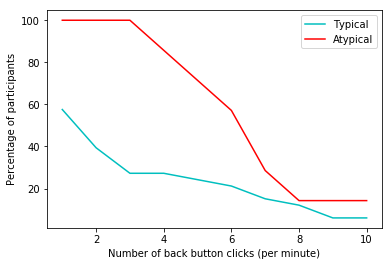

In [139]:
# ax = bk_btn_df.plot()
plt.plot(bk_btn_df['typical'], label='Typical', color='c')
plt.plot(bk_btn_df['atypical'], label='Atypical', color='r')
plt.legend()
plt.xlabel('Number of back button clicks (per minute)')
plt.ylabel('Percentage of participants')
plt.savefig('proportion_of_users_back_button.png', dpi=300)

This plot shows a clear difference between the two sets of users, on one hand all of the atypical users have occurrences of at least 3 back button clicks in the space of a minute while on the other only a small percentage of the typical users have this behaviour. Could this be a sign of technical difficulties, or at least a method of trying to solve it? One could hypothesize that the atypical users are attempting to reset the video/experience by going back to the start.

#### What about the next button?
What is also noticable about the recorded events is that the next button is recorded a lot. This is more expected because it's probably the only bottle neck in the whole experience -- everyone has to click next to get to the next step, so it naturally has a proportionally higher number of events. It has a total of 172 events in atypical and 668 events in typical.

But what if we dig a little deeper into this, is the behaviour similar for the next button as it is for the back button?

In [149]:
# Let's start with the simple counting of the events for each of the users.
next_btn_count_typical = count_events('next_button', typical_df)
next_btn_count_atypical = count_events('next_button', td_raw)
print(next_btn_count_typical)
print(next_btn_count_atypical)

{206: 40, 223: 18, 106: 0, 213: 0, 225: 37, 211: 29, 221: 44, 209: 19, 124: 16, 212: 22, 102: 19, 204: 20, 210: 21, 201: 35, 214: 41, 208: 23, 114: 11, 101: 18, 202: 23, 105: 17, 127: 33, 117: 16, 222: 19, 203: 6, 104: 16, 122: 29, 126: 13, 414: 0, 123: 28, 115: 1, 110: 16, 103: 19, 215: 19}
{109: 19, 205: 33, 121: 29, 112: 34, 220: 61, 217: 34, 113: 21}


So it's a frequent occurrer in both sets of users, which in all honesty is to be expected due to how much it is used.

But okay, let's find the event frequency and see what the it looks like when we iteratively increase the value of *x*. Is there a similar trend as the back button?

In [151]:
typical_result_data = []
for x in range(1, 11):
    typical_result_data.append(get_x_per_y(len(typical_pids), len(find_gte_x(typical_df, x, 'next_button'))))

atypical_result_data = []
for x in range(1, 11):
    atypical_result_data.append(get_x_per_y(len(atypical_pids), len(find_gte_x(td_raw, x, 'next_button'))))
    
df_data = {'number': np.arange(1, 11), 'typical': typical_result_data, 'atypical': atypical_result_data}
nxt_btn_df = pd.DataFrame(df_data, columns=['number', 'typical', 'atypical'])
nxt_btn_df.index = nxt_btn_df['number']
del nxt_btn_df['number']
nxt_btn_df

,typical,atypical
number,,
1,72.727273,100.000000
2,36.363636,100.000000
3,30.303030,85.714286
4,27.272727,85.714286
5,21.212121,42.857143
6,18.181818,42.857143
7,18.181818,42.857143
8,12.121212,28.571429
9,12.121212,14.285714


Text(0,0.5,'Percentage of participants')

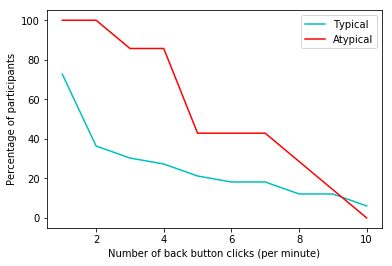

In [152]:
plt.plot(nxt_btn_df['typical'], label='Typical', color='c')
plt.plot(nxt_btn_df['atypical'], label='Atypical', color='r')
plt.legend()
plt.xlabel('Number of back button clicks (per minute)')
plt.ylabel('Percentage of participants')
# plt.savefig('proportion_of_users_back_button.png', dpi=300)

_What does this demonstrate?_
Namely that it's a similar trend to that seen with the back button events. 

I think more subtely it tells us that the high freqency of switching backwards and forwards between the steps seems to indicate technical problems.

To explore this a little further (to add to both the next button and back button analysis), let's look at the mean time between back/next button clicks for each participant group.

In [161]:
from statistics import mean
# Function to calculate the difference in seconds between two datetime objects.
def diff_in_secs(t1, t2):
    td = t1 - t2
    return td.total_seconds()

"""
def find_event_frequency(dataframe, pid, event):
    ts_item = dataframe[dataframe['participant_id'] == pid][['timestamp', 'item']] # get the two columns
    ts_item['timestamp'] = pd.to_datetime(ts_item['timestamp']) # make sure that it's a data time object
    ts_item.index = ts_item['timestamp'] # set the index of the data frame to the timestamp
    del ts_item['timestamp'] # delete the timestamp column
    ts_item_back = ts_item.loc[ts_item['item'] == event] # get the locations where back_button appears.
    ts_item_back['count'] = 1 # just add a count for each of the rows
    del ts_item_back['item'] # we no longer need this
    res = ts_item_back.resample('T').sum()# ts_df.resample('T').sum()
    return res
"""
# find the frequency for the back button and atypical
def find_mean_time_between_events(dataframe, event):
    mean_for_each_pid = []
    for pid in dataframe['participant_id'].unique():
        ts_item = dataframe[dataframe['participant_id'] == pid][['timestamp', 'item']] # get the two columns
        ts_item['timestamp'] = pd.to_datetime(ts_item['timestamp']) # make sure it's a datetime object
        ts_item_event = ts_item.loc[ts_item['item'] == event]
        count = 0
        previous = None
        for t in ts_item_event['timestamp']:
            if (previous is None):
                previous = t
            count += diff_in_secs(t, previous)
            previous = t
        mean_for_each_pid.append(count)
    return round(mean(mean_for_each_pid))
            
print('Atypical back button: ', find_mean_time_between_events(td_raw, 'back_button'))
print('Typical back button: ', find_mean_time_between_events(typical_df, 'back_button'))
print('Atypical next button: ', find_mean_time_between_events(td_raw, 'next_button'))
print(find_mean_time_between_events(typical_df, 'next_button'))

1275
32587
2033
37081
